Importing all the libraries required

In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

 performing the necessary corpus using Natural language toolkit(NLTK)

In [2]:

from nltk import sent_tokenize
from nltk import word_tokenize


import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

Implementing csv file to read the data and display the data in tabular form 

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')

train_original=data.copy()
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


categorize the data type and return the column labels

In [4]:
data.dtypes
data.columns

Index(['id', 'label', 'tweet'], dtype='object')

Reset the index of a dataframe

In [5]:
data.reset_index(drop = True).head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


Delete the unnecessary columns

In [6]:
data = data.drop(columns=['id'], axis=0)
print(data.head())

   label                                              tweet
0      0   @user when a father is dysfunctional and is s...
1      0  @user @user thanks for #lyft credit i can't us...
2      0                                bihday your majesty
3      0  #model   i love u take with u all the time in ...
4      0             factsguide: society now    #motivation


Clean the data

In [7]:
data.isna().sum()

label    0
tweet    0
dtype: int64

Read the data and convert the data into string data type

In [8]:
text = pd.Series(data.tweet.head(50)).to_string()

print(text)

print(len(text))


0      @user when a father is dysfunctional and is s...
1     @user @user thanks for #lyft credit i can't us...
2                                   bihday your majesty
3     #model   i love u take with u all the time in ...
4                factsguide: society now    #motivation
5     [2/2] huge fan fare and big talking before the...
6      @user camping tomorrow @user @user @user @use...
7     the next school year is the year for exams.ð...
8     we won!!! love the land!!! #allin #cavs #champ...
9      @user @user welcome here !  i'm   it's so #gr...
10     â #ireland consumer price index (mom) climb...
11    we are so selfish. #orlando #standwithorlando ...
12    i get to see my daddy today!!   #80days #getti...
13    @user #cnn calls #michigan middle school 'buil...
14    no comment!  in #australia   #opkillingbay #se...
15    ouch...junior is angryð#got7 #junior #yugyo...
16    i am thankful for having a paner. #thankful #p...
17                               retweet if you 

# Tokenization

Tokenize the text by sentences

In [9]:
sentences=sent_tokenize(text)
print(sentences)

["0      @user when a father is dysfunctional and is s...\n1     @user @user thanks for #lyft credit i can't us...\n2                                   bihday your majesty\n3     #model   i love u take with u all the time in ...\n4                factsguide: society now    #motivation\n5     [2/2] huge fan fare and big talking before the...\n6      @user camping tomorrow @user @user @user @use...\n7     the next school year is the year for exams.ð\x9f\x98...\n8     we won!!!", 'love the land!!!', '#allin #cavs #champ...\n9      @user @user welcome here !', "i'm   it's so #gr...\n10     â\x86\x9d #ireland consumer price index (mom) climb...\n11    we are so selfish.", '#orlando #standwithorlando ...\n12    i get to see my daddy today!!', "#80days #getti...\n13    @user #cnn calls #michigan middle school 'buil...\n14    no comment!", 'in #australia   #opkillingbay #se...\n15    ouch...junior is angryð\x9f\x98\x90#got7 #junior #yugyo...\n16    i am thankful for having a paner.', '#thankfu

Tokenize the text by words

In [10]:
words=word_tokenize(text)
print(words)

['0', '@', 'user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 's', '...', '1', '@', 'user', '@', 'user', 'thanks', 'for', '#', 'lyft', 'credit', 'i', 'ca', "n't", 'us', '...', '2', 'bihday', 'your', 'majesty', '3', '#', 'model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', '...', '4', 'factsguide', ':', 'society', 'now', '#', 'motivation', '5', '[', '2/2', ']', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'the', '...', '6', '@', 'user', 'camping', 'tomorrow', '@', 'user', '@', 'user', '@', 'user', '@', 'use', '...', '7', 'the', 'next', 'school', 'year', 'is', 'the', 'year', 'for', 'exams.ð\x9f\x98', '...', '8', 'we', 'won', '!', '!', '!', 'love', 'the', 'land', '!', '!', '!', '#', 'allin', '#', 'cavs', '#', 'champ', '...', '9', '@', 'user', '@', 'user', 'welcome', 'here', '!', 'i', "'m", 'it', "'s", 'so', '#', 'gr', '...', '10', 'â\x86\x9d', '#', 'ireland', 'consumer', 'price', 'index', '(', 'mom', ')', 'climb', '...', '11', 'we', 'are

Split the text and print the mostly occured words in the text

In [11]:
from collections import Counter
split_it =text.split()
Counter = Counter(split_it)
most_occur = Counter.most_common(10)
  
print(most_occur)

[('@user', 18), ('the', 12), ('a', 10), ('i', 9), ('is', 8), ('for', 7), ('to', 7), ('all', 5), ('in', 5), ('...', 5)]


plot the graph with FreqDist

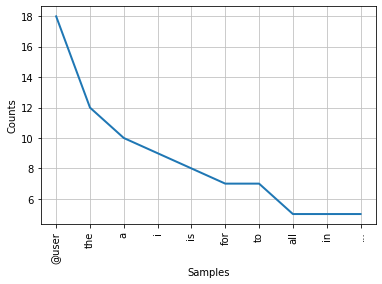

In [12]:
from nltk.probability import FreqDist
fdist=FreqDist(split_it)
fdist.plot(10)

Remove the special characters and convert the string into lower case and print the length of the text

In [13]:
num = []
for ele in words:
    if ele.isalpha():
        num.append(ele.lower())
print(num) 
print(len(num))       

['user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 's', 'user', 'user', 'thanks', 'for', 'lyft', 'credit', 'i', 'ca', 'us', 'bihday', 'your', 'majesty', 'model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'factsguide', 'society', 'now', 'motivation', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'the', 'user', 'camping', 'tomorrow', 'user', 'user', 'user', 'use', 'the', 'next', 'school', 'year', 'is', 'the', 'year', 'for', 'we', 'won', 'love', 'the', 'land', 'allin', 'cavs', 'champ', 'user', 'user', 'welcome', 'here', 'i', 'it', 'so', 'gr', 'ireland', 'consumer', 'price', 'index', 'mom', 'climb', 'we', 'are', 'so', 'selfish', 'orlando', 'standwithorlando', 'i', 'get', 'to', 'see', 'my', 'daddy', 'today', 'getti', 'user', 'cnn', 'calls', 'michigan', 'middle', 'school', 'no', 'comment', 'in', 'australia', 'opkillingbay', 'se', 'ouch', 'junior', 'is', 'junior', 'yugyo', 'i', 'am', 'thankful', 'for', 'having', 'a', 'paner', 'thankful', '

Check the list of stopwords 

In [14]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Remove the unnecessary words in the data

In [15]:
stop_words1=['users']
stop_words=list(set(stop_words).union(stop_words1))


Create an empty set to store the clean text

In [16]:
clean_text= []

for n in num:
    if n not in stop_words:
        clean_text.append(n)
        
print(clean_text)
print("\n")
print(len(clean_text))

['user', 'father', 'dysfunctional', 'user', 'user', 'thanks', 'lyft', 'credit', 'ca', 'us', 'bihday', 'majesty', 'model', 'love', 'u', 'take', 'u', 'time', 'factsguide', 'society', 'motivation', 'huge', 'fan', 'fare', 'big', 'talking', 'user', 'camping', 'tomorrow', 'user', 'user', 'user', 'use', 'next', 'school', 'year', 'year', 'love', 'land', 'allin', 'cavs', 'champ', 'user', 'user', 'welcome', 'gr', 'ireland', 'consumer', 'price', 'index', 'mom', 'climb', 'selfish', 'orlando', 'standwithorlando', 'get', 'see', 'daddy', 'today', 'getti', 'user', 'cnn', 'calls', 'michigan', 'middle', 'school', 'comment', 'australia', 'opkillingbay', 'se', 'ouch', 'junior', 'junior', 'yugyo', 'thankful', 'paner', 'thankful', 'p', 'retweet', 'agree', 'friday', 'smiles', 'around', 'via', 'ig', 'use', 'know', 'essential', 'oils', 'made', 'people', 'blaming', 'ha', 'conceded', 'goal', 'sad', 'little', 'badday', 'coneofshame', 'cats', 'product', 'day', 'happy', 'man', 'wine', 'tool', 'user', 'user', 'lumpy

To find the frequency of each word in a text file 

In [17]:
freqdist = FreqDist(clean_text)

freqdist.most_common(10)

[('user', 18),
 ('u', 4),
 ('thankful', 4),
 ('love', 3),
 ('time', 3),
 ('fan', 3),
 ('father', 2),
 ('bihday', 2),
 ('model', 2),
 ('take', 2)]

Plot the frequency distribution graph for the 10 most commomly occured words

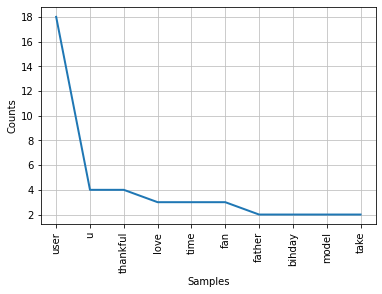

In [18]:
freqdist.plot(10)

import the libraries required for word cloud and link the image with the data. Generate the word clloud and plot the word cloud

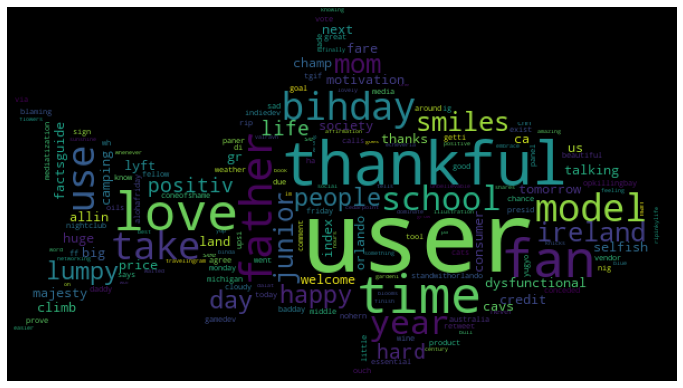

In [20]:
from wordcloud import WordCloud, ImageColorGenerator
import requests
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
color = np.array(Image.open(requests.get('http://clipart-library.com/newimages/fish-clip-art-30.png', stream=True).raw))
pic_colors = ImageColorGenerator(color)
clean_words_1 = " ".join([c for c in clean_text])
wordcloud0 = WordCloud(background_color='black', height=1500, width=4000,mask=color).generate(clean_words_1)
plt.figure(figsize = (12, 12)) 
plt.imshow(wordcloud0)
plt.axis("off") 
plt.show() 

#stemming

Import the stemming libraries and list the data set

In [21]:
from nltk.stem import PorterStemmer

port= PorterStemmer()
list_word = clean_text

for n in list_word:
    print(port.stem(n))

user
father
dysfunct
user
user
thank
lyft
credit
ca
us
bihday
majesti
model
love
u
take
u
time
factsguid
societi
motiv
huge
fan
fare
big
talk
user
camp
tomorrow
user
user
user
use
next
school
year
year
love
land
allin
cav
champ
user
user
welcom
gr
ireland
consum
price
index
mom
climb
selfish
orlando
standwithorlando
get
see
daddi
today
getti
user
cnn
call
michigan
middl
school
comment
australia
opkillingbay
se
ouch
junior
junior
yugyo
thank
paner
thank
p
retweet
agre
friday
smile
around
via
ig
use
know
essenti
oil
made
peopl
blame
ha
conced
goal
sad
littl
badday
coneofsham
cat
product
day
happi
man
wine
tool
user
user
lumpi
say
prove
lumpi
user
tgif
ff
gamedev
indiedev
beauti
sign
vendor
upsi
user
smile
media
great
panel
mediat
happi
father
day
user
peopl
went
nightclub
good
nig
never
chanc
vote
presid
alohafriday
time
exist
positiv
user
rip
fellow
nohern
ireland
fan
wh
hard
monday
due
cloudi
weather
di
unbeliev
centuri
bull
domin
travelingram
dalat
ripinkylif
user
one
word
tell
p
oh
c

Stem the words and print the supported languages

In [22]:
from nltk.stem import SnowballStemmer

snow = SnowballStemmer("english")
list_word = clean_text

for n in list_word:
    print(snow.stem(n))
print('\n')
SnowballStemmer.languages

user
father
dysfunct
user
user
thank
lyft
credit
ca
us
bihday
majesti
model
love
u
take
u
time
factsguid
societi
motiv
huge
fan
fare
big
talk
user
camp
tomorrow
user
user
user
use
next
school
year
year
love
land
allin
cav
champ
user
user
welcom
gr
ireland
consum
price
index
mom
climb
selfish
orlando
standwithorlando
get
see
daddi
today
getti
user
cnn
call
michigan
middl
school
comment
australia
opkillingbay
se
ouch
junior
junior
yugyo
thank
paner
thank
p
retweet
agre
friday
smile
around
via
ig
use
know
essenti
oil
made
peopl
blame
ha
conced
goal
sad
littl
badday
coneofsham
cat
product
day
happi
man
wine
tool
user
user
lumpi
say
prove
lumpi
user
tgif
ff
gamedev
indiedev
beauti
sign
vendor
upsi
user
smile
media
great
panel
mediat
happi
father
day
user
peopl
went
nightclub
good
nig
never
chanc
vote
presid
alohafriday
time
exist
positiv
user
rip
fellow
nohern
ireland
fan
wh
hard
monday
due
cloudi
weather
di
unbeliev
centuri
bull
domin
travelingram
dalat
ripinkylif
user
one
word
tell
p
oh
c

('arabic',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'hungarian',
 'italian',
 'norwegian',
 'porter',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish')

#Lemmatization

Reciprocate the actual word of the language using lemmatization

In [23]:
from nltk import WordNetLemmatizer
l = WordNetLemmatizer()
list_word = clean_text
for n in list_word:
    print(l.lemmatize(n ,pos="v"))

user
father
dysfunctional
user
user
thank
lyft
credit
ca
us
bihday
majesty
model
love
u
take
u
time
factsguide
society
motivation
huge
fan
fare
big
talk
user
camp
tomorrow
user
user
user
use
next
school
year
year
love
land
allin
cavs
champ
user
user
welcome
gr
ireland
consumer
price
index
mom
climb
selfish
orlando
standwithorlando
get
see
daddy
today
getti
user
cnn
call
michigan
middle
school
comment
australia
opkillingbay
se
ouch
junior
junior
yugyo
thankful
paner
thankful
p
retweet
agree
friday
smile
around
via
ig
use
know
essential
oil
make
people
blame
ha
concede
goal
sad
little
badday
coneofshame
cat
product
day
happy
man
wine
tool
user
user
lumpy
say
prove
lumpy
user
tgif
ff
gamedev
indiedev
beautiful
sign
vendor
upsi
user
smile
media
great
panel
mediatization
happy
father
day
user
people
go
nightclub
good
nig
never
chance
vote
presid
alohafriday
time
exist
positiv
user
rip
fellow
nohern
ireland
fan
wh
hard
monday
due
cloudy
weather
di
unbelievable
century
bull
dominate
traveling

Lemmatize with pos tag

In [24]:
lemma = WordNetLemmatizer()
for n in list_word:
  print(lemma.lemmatize(n, pos="v"))
  print(lemma.lemmatize(n, pos="n"))
  print(lemma.lemmatize(n, pos="r"))
  print(lemma.lemmatize(n, pos="a"))

user
user
user
user
father
father
father
father
dysfunctional
dysfunctional
dysfunctional
dysfunctional
user
user
user
user
user
user
user
user
thank
thanks
thanks
thanks
lyft
lyft
lyft
lyft
credit
credit
credit
credit
ca
ca
ca
ca
us
u
us
us
bihday
bihday
bihday
bihday
majesty
majesty
majesty
majesty
model
model
model
model
love
love
love
love
u
u
u
u
take
take
take
take
u
u
u
u
time
time
time
time
factsguide
factsguide
factsguide
factsguide
society
society
society
society
motivation
motivation
motivation
motivation
huge
huge
huge
huge
fan
fan
fan
fan
fare
fare
fare
fare
big
big
big
big
talk
talking
talking
talking
user
user
user
user
camp
camping
camping
camping
tomorrow
tomorrow
tomorrow
tomorrow
user
user
user
user
user
user
user
user
user
user
user
user
use
use
use
use
next
next
next
next
school
school
school
school
year
year
year
year
year
year
year
year
love
love
love
love
land
land
land
land
allin
allin
allin
allin
cavs
cavs
cavs
cavs
champ
champ
champ
champ
user
user
user
user


Lemmatize each word with the suitable pos tag

In [25]:
t = nltk.pos_tag(clean_text)
print (t)

[('user', 'NN'), ('father', 'RBR'), ('dysfunctional', 'JJ'), ('user', 'NN'), ('user', 'NN'), ('thanks', 'NNS'), ('lyft', 'VBP'), ('credit', 'NN'), ('ca', 'MD'), ('us', 'PRP'), ('bihday', 'VB'), ('majesty', 'JJ'), ('model', 'NN'), ('love', 'NN'), ('u', 'JJ'), ('take', 'VB'), ('u', 'JJ'), ('time', 'NN'), ('factsguide', 'JJ'), ('society', 'NN'), ('motivation', 'NN'), ('huge', 'JJ'), ('fan', 'NN'), ('fare', 'NN'), ('big', 'JJ'), ('talking', 'VBG'), ('user', 'JJ'), ('camping', 'NN'), ('tomorrow', 'NN'), ('user', 'IN'), ('user', 'NNP'), ('user', 'NN'), ('use', 'NN'), ('next', 'JJ'), ('school', 'NN'), ('year', 'NN'), ('year', 'NN'), ('love', 'IN'), ('land', 'NN'), ('allin', 'NN'), ('cavs', 'NN'), ('champ', 'NN'), ('user', 'IN'), ('user', 'JJ'), ('welcome', 'JJ'), ('gr', 'NN'), ('ireland', 'NN'), ('consumer', 'NN'), ('price', 'NN'), ('index', 'NN'), ('mom', 'VBD'), ('climb', 'JJ'), ('selfish', 'JJ'), ('orlando', 'NN'), ('standwithorlando', 'NN'), ('get', 'VB'), ('see', 'NN'), ('daddy', 'JJ'), 

Tokenizing the text

In [26]:
t_w = word_tokenize(text)

for words in t_w:
    tag_word = nltk.pos_tag(t_w)
    
tag_word

[('0', 'CD'),
 ('@', 'NNS'),
 ('user', 'RB'),
 ('when', 'WRB'),
 ('a', 'DT'),
 ('father', 'NN'),
 ('is', 'VBZ'),
 ('dysfunctional', 'JJ'),
 ('and', 'CC'),
 ('is', 'VBZ'),
 ('s', 'JJ'),
 ('...', ':'),
 ('1', 'CD'),
 ('@', 'NNP'),
 ('user', 'NN'),
 ('@', 'NNP'),
 ('user', 'NN'),
 ('thanks', 'NNS'),
 ('for', 'IN'),
 ('#', '#'),
 ('lyft', 'JJ'),
 ('credit', 'NN'),
 ('i', 'NN'),
 ('ca', 'MD'),
 ("n't", 'RB'),
 ('us', 'PRP'),
 ('...', ':'),
 ('2', 'CD'),
 ('bihday', 'IN'),
 ('your', 'PRP$'),
 ('majesty', 'JJ'),
 ('3', 'CD'),
 ('#', '#'),
 ('model', 'NN'),
 ('i', 'NN'),
 ('love', 'VBP'),
 ('u', 'JJ'),
 ('take', 'NN'),
 ('with', 'IN'),
 ('u', 'JJ'),
 ('all', 'PDT'),
 ('the', 'DT'),
 ('time', 'NN'),
 ('in', 'IN'),
 ('...', ':'),
 ('4', 'CD'),
 ('factsguide', 'NN'),
 (':', ':'),
 ('society', 'NN'),
 ('now', 'RB'),
 ('#', '#'),
 ('motivation', 'NN'),
 ('5', 'CD'),
 ('[', 'NN'),
 ('2/2', 'CD'),
 (']', 'JJ'),
 ('huge', 'JJ'),
 ('fan', 'NN'),
 ('fare', 'NN'),
 ('and', 'CC'),
 ('big', 'JJ'),
 ('talki

# Parser

Create a parser and parse the text

In [27]:
grammar = "NP : {<DT>?<JJ>*<NN>} "
import matplotlib.pyplot as plt
parser = nltk.RegexpParser(grammar)
output = parser.parse(tag_word)
print (output)

(S
  0/CD
  @/NNS
  user/RB
  when/WRB
  (NP a/DT father/NN)
  is/VBZ
  dysfunctional/JJ
  and/CC
  is/VBZ
  s/JJ
  .../:
  1/CD
  @/NNP
  (NP user/NN)
  @/NNP
  (NP user/NN)
  thanks/NNS
  for/IN
  #/#
  (NP lyft/JJ credit/NN)
  (NP i/NN)
  ca/MD
  n't/RB
  us/PRP
  .../:
  2/CD
  bihday/IN
  your/PRP$
  majesty/JJ
  3/CD
  #/#
  (NP model/NN)
  (NP i/NN)
  love/VBP
  (NP u/JJ take/NN)
  with/IN
  u/JJ
  all/PDT
  (NP the/DT time/NN)
  in/IN
  .../:
  4/CD
  (NP factsguide/NN)
  :/:
  (NP society/NN)
  now/RB
  #/#
  (NP motivation/NN)
  5/CD
  (NP [/NN)
  2/2/CD
  (NP ]/JJ huge/JJ fan/NN)
  (NP fare/NN)
  and/CC
  big/JJ
  talking/VBG
  before/IN
  the/DT
  .../:
  6/CD
  @/NNP
  (NP user/NN)
  camping/VBG
  (NP tomorrow/NN)
  @/NNP
  (NP user/NN)
  @/NNP
  user/NNP
  @/NNP
  user/NNP
  @/NNP
  (NP use/NN)
  .../:
  7/CD
  (NP the/DT next/JJ school/NN)
  (NP year/NN)
  is/VBZ
  (NP the/DT year/NN)
  for/IN
  (NP exams.ð/NN)
  .../:
  8/CD
  we/PRP
  won/VBD
  !/.
  !/.
  !/.
  love

# Named entity recognition(NER)

Apply the word tokenization  and pos tagging. Classify the category of words using nltk.chunk method

In [28]:
t_w1= word_tokenize(text)
for n in t_w:
    tag_word= nltk.pos_tag(t_w)


from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint
N = nltk.ne_chunk(tag_word,binary=False)
print(N)

(S
  0/CD
  @/NNS
  user/RB
  when/WRB
  a/DT
  father/NN
  is/VBZ
  dysfunctional/JJ
  and/CC
  is/VBZ
  s/JJ
  .../:
  1/CD
  @/NNP
  user/NN
  @/NNP
  user/NN
  thanks/NNS
  for/IN
  #/#
  lyft/JJ
  credit/NN
  i/NN
  ca/MD
  n't/RB
  us/PRP
  .../:
  2/CD
  bihday/IN
  your/PRP$
  majesty/JJ
  3/CD
  #/#
  model/NN
  i/NN
  love/VBP
  u/JJ
  take/NN
  with/IN
  u/JJ
  all/PDT
  the/DT
  time/NN
  in/IN
  .../:
  4/CD
  factsguide/NN
  :/:
  society/NN
  now/RB
  #/#
  motivation/NN
  5/CD
  [/NN
  2/2/CD
  ]/JJ
  huge/JJ
  fan/NN
  fare/NN
  and/CC
  big/JJ
  talking/VBG
  before/IN
  the/DT
  .../:
  6/CD
  @/NNP
  user/NN
  camping/VBG
  tomorrow/NN
  @/NNP
  user/NN
  @/NNP
  user/NNP
  @/NNP
  user/NNP
  @/NNP
  use/NN
  .../:
  7/CD
  the/DT
  next/JJ
  school/NN
  year/NN
  is/VBZ
  the/DT
  year/NN
  for/IN
  exams.ð/NN
  .../:
  8/CD
  we/PRP
  won/VBD
  !/.
  !/.
  !/.
  love/VB
  the/DT
  land/NN
  !/.
  !/.
  !/.
  #/#
  allin/JJ
  #/#
  cavs/JJ
  #/#
  champ/NN
  .../

#Wordnet

Define the word using wordnet function

In [29]:
from nltk.corpus import wordnet
for w in wordnet.synsets("Fun"): 
    print(w.name())
    print(w.definition())
    print(w.examples())
    
    for l in w.lemmas(): 
        print(l)
    print("\n")

fun.n.01
activities that are enjoyable or amusing
['I do it for the fun of it', 'he is fun to have around']
Lemma('fun.n.01.fun')
Lemma('fun.n.01.merriment')
Lemma('fun.n.01.playfulness')


fun.n.02
verbal wit or mockery (often at another's expense but not to be taken seriously)
['he became a figure of fun', 'he said it in sport']
Lemma('fun.n.02.fun')
Lemma('fun.n.02.play')
Lemma('fun.n.02.sport')


fun.n.03
violent and excited activity
['she asked for money and then the fun began', 'they began to fight like fun']
Lemma('fun.n.03.fun')


playfulness.n.02
a disposition to find (or make) causes for amusement
['her playfulness surprised me', 'he was fun to be with']
Lemma('playfulness.n.02.playfulness')
Lemma('playfulness.n.02.fun')




#Bag of words

Create an object and feature the model

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
c_v = CountVectorizer()
BW= c_v.fit_transform(sentences).toarray()
print(c_v.vocabulary_)
print("\n")
print(c_v.get_feature_names_out())
print("\n")
print(BW)

{'user': 247, 'when': 260, 'father': 112, 'is': 150, 'dysfunctional': 101, 'and': 54, 'thanks': 232, 'for': 119, 'lyft': 163, 'credit': 92, 'can': 78, 'us': 245, 'bihday': 68, 'your': 272, 'majesty': 165, 'model': 171, 'love': 160, 'take': 226, 'with': 265, 'all': 49, 'the': 234, 'time': 236, 'in': 146, 'factsguide': 109, 'society': 222, 'now': 186, 'motivation': 176, 'huge': 140, 'fan': 110, 'fare': 111, 'big': 66, 'talking': 227, 'before': 63, 'camping': 77, 'tomorrow': 239, 'use': 246, 'next': 180, 'school': 213, 'year': 270, 'exams': 107, 'we': 255, 'won': 266, 'land': 157, 'allin': 50, 'cavs': 80, 'champ': 83, 'welcome': 257, 'here': 138, 'it': 151, 'so': 220, 'gr': 129, '10': 1, 'ireland': 149, 'consumer': 91, 'price': 204, 'index': 147, 'mom': 172, 'climb': 85, '11': 2, 'are': 56, 'selfish': 216, 'orlando': 195, 'standwithorlando': 224, '12': 3, 'get': 123, 'to': 237, 'see': 215, 'my': 177, 'daddy': 93, 'today': 238, '80days': 44, 'getti': 124, '13': 4, 'cnn': 87, 'calls': 76, '

Plot the bar graph for the top 50 tokens

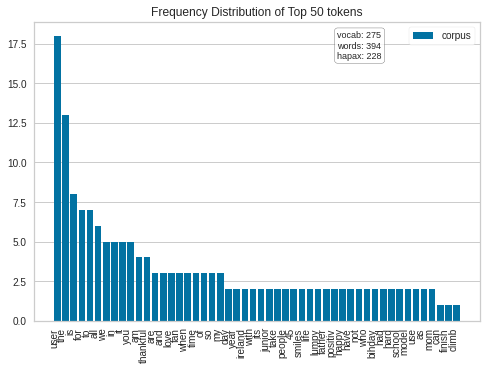

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [31]:
from yellowbrick.text import FreqDistVisualizer
features=c_v.get_feature_names_out()
fig=plt.figure()
plt.title('barplot')
vis=FreqDistVisualizer(features=features,orient='v')
vis.fit_transform_show(BW)

To find the location and datatype of the data

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
data.iloc[:,0].value_counts()

0    29720
1     2242
Name: label, dtype: int64

Plot a bar graph using the counterplot method

Text(0.5, 1.0, '+ve & -ve sentiments')

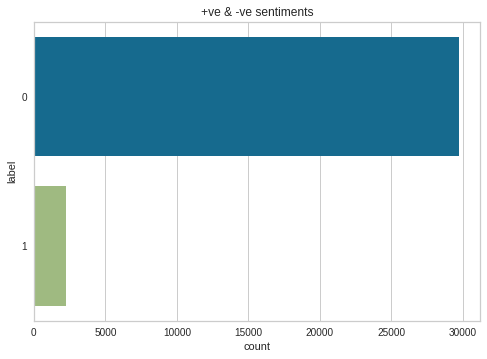

In [33]:
sns.countplot(y=data.iloc[:,0]).set_title('+ve & -ve sentiments')

Tokenize the documents and fit the data into array

In [34]:
vect=TfidfVectorizer(lowercase = True, tokenizer = None, analyzer = 'word', strip_accents='ascii',stop_words=stop_words,token_pattern='\w+',sublinear_tf=True)
vec_word = vect.fit_transform(np.array((data.tweet).ravel()))

Vectorize the vocabulary

In [35]:
vect.vocabulary_

{'user': 38421,
 'father': 13319,
 'dysfunctional': 11694,
 'selfish': 32359,
 'drags': 11377,
 'kids': 20473,
 'dysfunction': 11693,
 'run': 31492,
 'thanks': 36239,
 'lyft': 22514,
 'credit': 9311,
 'use': 38411,
 'cause': 7201,
 'offer': 26445,
 'wheelchair': 39770,
 'vans': 38564,
 'pdx': 27637,
 'disapointed': 10796,
 'getthanked': 15324,
 'bihday': 5052,
 'majesty': 22721,
 'model': 24086,
 'love': 22169,
 'u': 37921,
 'take': 35671,
 'time': 36824,
 'ur': 38370,
 'factsguide': 13080,
 'society': 33742,
 'motivation': 24390,
 '2': 430,
 'huge': 17898,
 'fan': 13197,
 'fare': 13230,
 'big': 4991,
 'talking': 35710,
 'leave': 21229,
 'chaos': 7460,
 'pay': 27580,
 'disputes': 10914,
 'get': 15292,
 'allshowandnogo': 2372,
 'camping': 6810,
 'tomorrow': 37050,
 'dannya': 9871,
 'next': 25524,
 'school': 32033,
 'year': 40749,
 'exams': 12772,
 'think': 36592,
 'hate': 16860,
 'imagine': 18448,
 'actorslife': 1676,
 'revolutionschool': 30909,
 'girl': 15444,
 'land': 20960,
 'allin':

Plot the graph using frequency distribution visualizer

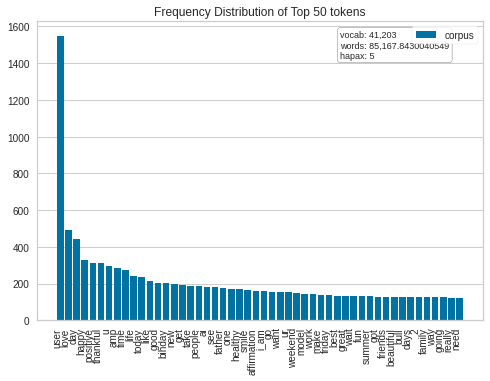

<31962x41203 sparse matrix of type '<class 'numpy.float64'>'
	with 256845 stored elements in Compressed Sparse Row format>

In [36]:
feature = vect.get_feature_names_out()
picture=plt.figure()
plt.title('bar plot of TFIDF')
vis=FreqDistVisualizer(features=feature,orient='v')
vis.fit_transform_show(vec_word)

Split the data into train and test

In [37]:
a = vec_word
b = np.array((data.iloc[:,0]).ravel())
a_train, a_test, b_train, b_test = train_test_split(a,b, test_size=0.33)

Perform the over-sampling using SMOTE

In [38]:
from imblearn.over_sampling import SMOTE
Sample = SMOTE()
a,b = Sample.fit_resample(a,b)

Find the location and data type of the text

In [39]:
xyz = pd.DataFrame(b)
xyz.iloc[:,0].value_counts()

0    29720
1    29720
Name: 0, dtype: int64

Plot a histogam using countplot

Text(0.5, 1.0, '+ve & -ve sentiments')

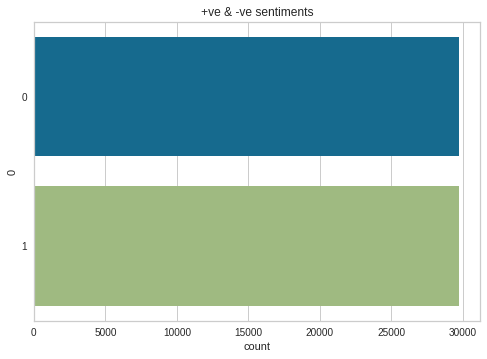

In [40]:
sns.countplot(y=xyz.iloc[:,0]).set_title('+ve & -ve sentiments')

Install the catboost library

In [41]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 1.4 MB/s 


Import the libraries required for the model

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Build the model check the accuracy of the model based on train and test methods

In [43]:
def Build(model,a_train, a_test, b_train, b_test):
  model.fit(a_train, b_train)
  btrain_out = model.predict(a_train)
  print("Confusion Matrix: ", pd.crosstab(b_train, btrain_out),"\n")
  print("Classification Report: ", classification_report(b_train, btrain_out),"\n")
  print("Data Accuracy: ", accuracy_score(b_train, btrain_out),"\n")

  print("\n----------------------\n")

  btest_out = model.predict(a_test)
  print("Confusion Matrix: ", pd.crosstab(b_test, btest_out),"\n")
  print("Classification Report: ", classification_report(b_test, btest_out),"\n")
  print("Data Accuracy: ", accuracy_score(b_test, btest_out),"\n")

  print("\n----------------------\n")

Define the model with parameters

In [44]:
log_reg = LogisticRegression()
s_v_c= SVC(kernel='linear', gamma=0.01)
k_n_c= KNeighborsClassifier(n_neighbors=4)
r_f_c = RandomForestClassifier()
xg_boost = XGBClassifier(learning_rate=0.19, max_depth=8, n_estimators=100, scale_pos_weight= 3 )
cat = CatBoostClassifier()
multi = MultinomialNB()
m_l_p = MLPClassifier(hidden_layer_sizes=(100, ),learning_rate_init=0.02)

create a list of various models and pass the created functions 

In [45]:
mod = [
          {"title":"LogisticRegression","type":log_reg},
          {"title":"SVC","type":s_v_c},
          {"title":"KNeighborsClassifier","type":k_n_c},
          {"title":"RandomForestClassifier","type":r_f_c},
          {"title":"XGBClassifier","type":xg_boost},
          {"title":"CatBoostClassifier","type":cat},
          {"title":"MultinomialNB","type":multi},
]

Loop through the models and print the accuracy scores

In [46]:
for m in mod:
  print(m['title'])
  print("--------\n")

  Build(m['type'], a_train, a_test, b_train, b_test)
  print("-------------------- Next Model --------------------")
  print("\n")

LogisticRegression
--------

Confusion Matrix:  col_0      0    1
row_0            
0      19877   13
1       1063  461 

Classification Report:                precision    recall  f1-score   support

           0       0.95      1.00      0.97     19890
           1       0.97      0.30      0.46      1524

    accuracy                           0.95     21414
   macro avg       0.96      0.65      0.72     21414
weighted avg       0.95      0.95      0.94     21414
 

Data Accuracy:  0.9497524983655552 


----------------------

Confusion Matrix:  col_0     0    1
row_0           
0      9820   10
1       553  165 

Classification Report:                precision    recall  f1-score   support

           0       0.95      1.00      0.97      9830
           1       0.94      0.23      0.37       718

    accuracy                           0.95     10548
   macro avg       0.94      0.61      0.67     10548
weighted avg       0.95      0.95      0.93     10548
 

Data Accuracy:  0.946

Based on the model performance, we can conclude that Linear svc model is the best fit model when compared to the other models. While Random Forest Classifier and MLP Classifier are overfitting as the performance on train data is 100% (approximately).  